## Effect of noise and height on the inversion
This study has been demonstrated in the EMagPy paper [McLachlan et al. (2021)](https://doi.org/10.1016/j.cageo.2020.104561).

All inversions are performed with the ROPE solver on a two-layer model with a varying depth. (a) Inversion with 0% noise with device on the ground. (b) Inversion with 5% noise on the ground. (c) Inversion with 0% noise at 1 m above the ground (d) Inversion with 5% noise at 1 m above the ground. The red line represents the true interface between the two layers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src') # add path where emagpy is
from emagpy import Problem

datadir = '../src/examples/'

letters = ['a','b','c','d','e','f','g','h','i','j']

In [2]:
# parameters for the synthetic model
nlayer = 2 # number of layer
npos = 20 # number of sampling positions
conds = np.ones((npos, nlayer))*[20, 100]
x = np.linspace(0.1, 2, npos)[:,None]
depths = 0.65 + 0.2 * np.sin(x*np.pi*2) # wave
coils0 = ['VCP1.48f10000h0', 'VCP2.82f10000h0', 'VCP4.49f10000h0',
          'HCP1.48f10000h0', 'HCP2.82f10000h0', 'HCP4.49f10000h0']
coils1 = ['VCP1.48f10000h1', 'VCP2.82f10000h1', 'VCP4.49f10000h1',
          'HCP1.48f10000h1', 'HCP2.82f10000h1', 'HCP4.49f10000h1']
coils = [coils0, coils0, coils1, coils1]
noises = [0, 0.05, 0, 0.05]
ks = []
# generate ECa using forward model
for i in range(4):
    k = Problem()
    k.setModels([depths], [conds])
    _ = k.forward(forwardModel='FSlin', coils=coils[i], noise=noises[i])
    ks.append(k)

# invert
for k in ks:
    k.setInit(depths0=np.array([0.5]), fixedDepths=[False])
    k.invert(forwardModel='FSlin', method='ROPE', regularization='l1',
             bnds=[(0.05, 2.5), (5, 150), (5, 150)], rep=1000, njobs=-1)

  0%|                                                    | 0/20 [00:00<?, ?it/s]

Forward modelling
Forward modelling
Forward modelling
Forward modelling


100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 111.83it/s]


Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  with  1000  repetitions
The objective function will be maximized
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  with  1000  repetitions
The objective function will be maximized
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  with  1000  repetitions
The objective function will be maximized
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Starting the ROPE algotrithm with 

100%|████████████████████████████████████████| 20/20 [00:00<00:00, 20738.22it/s]

Stopping samplig
Stopping samplig

*** Final SPOTPY summary ***

*** Final SPOTPY summary ***
Total Duration: 2.52 seconds
Total Repetitions: Total Duration: 2.67 seconds1000

Total Repetitions: Maximal objective value: -1.070391000

Corresponding parameter setting:
Maximal objective value: -0.875831
Corresponding parameter setting:
x0: 0.766408
x1: 19.4197
x2: 101.249
******************************

x0: 0.86008
x1: 20.7455
x2: 100.499
******************************

Stopping samplig

*** Final SPOTPY summary ***
Total Duration: 2.72 seconds
Total Repetitions: 1000
Maximal objective value: -1.07558
Corresponding parameter setting:
x0: 0.34276
x1: 9.323
x2: 96.8252
******************************

Stopping samplig

*** Final SPOTPY summary ***
Total Duration: 2.71 seconds
Total Repetitions: 1000
Maximal objective value: -0.966446
Corresponding parameter setting:
x0: 0.545657
x1: 20.2531
x2: 100.955
******************************

Starting the ROPE algotrithm with 1000 repetitions...
Init

50 input vectors with 3 parameters
Generating 126 parameters:
(32, 51)
(80, 101)
(106, 151)
(130, 201)
50 input vectors with 3 parameters
Generating 126 parameters:
(27, 51)
(75, 101)
(113, 151)
(157, 201)
50 input vectors with 3 parameters
Generating 126 parameters:
(46, 51)
(95, 101)
(143, 151)
50 input vectors with 3 parameters
Generating 126 parameters:
(51, 51)
(89, 101)
(138, 151)
50 input vectors with 3 parameters
Generating 126 parameters:
(51, 51)
(101, 101)
(141, 151)
50 input vectors with 3 parameters
Generating 126 parameters:
(28, 51)50 input vectors with 3 parameters
Generating 126 parameters:

(58, 101)
(44, 51)
(102, 151)
(71, 101)
(144, 201)
(120, 151)
(146, 201)
50 input vectors with 3 parameters
Generating 126 parameters:
(44, 51)
(84, 101)
(134, 151)
13 input vectors with 3 parameters
Generating 126 parameters:
(14, 14)
(21, 27)
(33, 40)
(41, 53)
(48, 66)
(60, 79)
(63, 92)
(66, 105)
(71, 118)
(76, 131)
(78, 144)
(80, 157)
(86, 170)
(97, 183)
(105, 196)
(111, 209)
(1

100%|████████████████████████████████████████| 20/20 [00:00<00:00, 31619.33it/s]

Stopping samplig

*** Final SPOTPY summary ***
Total Duration: 2.79 seconds
Total Repetitions: 1000
Maximal objective value: -1.71509
Corresponding parameter setting:
x0: 0.445602
x1: 37.1517
x2: 86.3062
******************************

13 input vectors with 3 parameters
Generating 126 parameters:
(3, 14)
(3, 27)
(4, 40)
(6, 53)
(6, 66)
(9, 79)
(10, 92)
(13, 105)
(17, 118)
(19, 131)
(21, 144)
(21, 157)
(21, 170)
(22, 183)
(23, 196)
(26, 209)
(30, 222)
(39, 235)
(40, 248)
(43, 261)
(43, 274)
(45, 287)
(51, 300)
(54, 313)
(57, 326)
(59, 339)
(61, 352)
(62, 365)
(63, 378)
(65, 391)
(66, 404)
(68, 417)
(69, 430)
(74, 443)
(75, 456)
(77, 469)
(77, 482)
(78, 495)
(80, 508)
(81, 521)
(83, 534)
(83, 547)
(84, 560)
(87, 573)
(87, 586)
(89, 599)
(89, 612)
(91, 625)
(93, 638)
(96, 651)
(100, 664)
(103, 677)
(106, 690)
(107, 703)
(112, 716)
(112, 729)
(113, 742)
(117, 755)
(124, 768)
(126, 781)
13 input vectors with 3 parameters
Generating 126 parameters:
(2, 14)
(2, 27)
(3, 40)
Stopping samplig
(4

Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  with  1000  repetitions
The objective function will be maximized
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  with  1000  repetitions
The objective function will be maximized
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  with  1000  repetitions
The objective function will be maximized
SPOTPY will automatically adjust the number of total repetitions.
Starting the ROPE algotrithm with 

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 913.46it/s]

Stopping samplig

*** Final SPOTPY summary ***
Total Duration: 5.61 seconds
Total Repetitions: 1000
Maximal objective value: -0.913765
Corresponding parameter setting:
x0: 0.568823
x1: 23.6363
x2: 100.248
******************************

Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  with  1000  repetitions
The objective function will be maximized
SPOTPY will automatically adjust the number of total repetitions.
Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  with  1000  repetitions
The objective function will be maximized
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  w

Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  with  1000  repetitions
The objective function will be maximized
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  with  1000  repetitions
The objective function will be maximized
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Starting the ROPE algotrithm with 1000 repetitions...
Initializing the  RObust Parameter Estimation (ROPE) algorithm  with  1000  repetitions
The objective function will be maximized
SPOTPY will automatically adjust the number of total repetitions.
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Starting the ROPE algotrithm with 

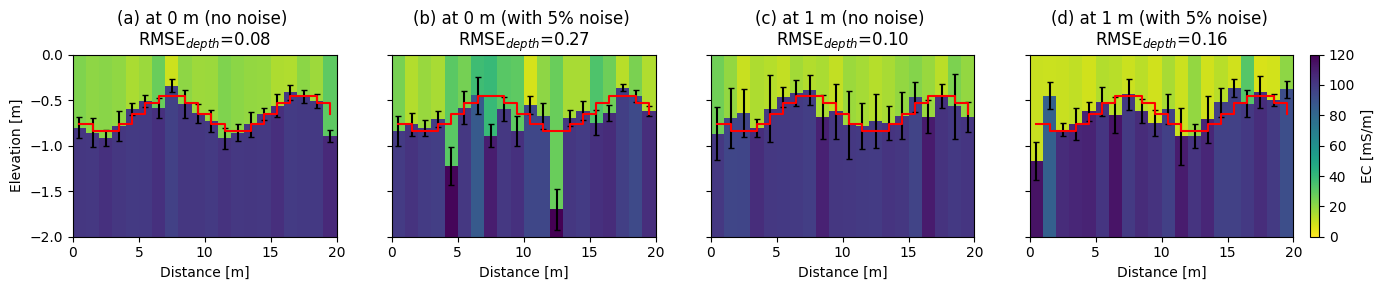

In [3]:
# graph of inverted values
titles = ['(a) at 0 m (no noise)', '(b) at 0 m (with 5% noise)',
          '(c) at 1 m (no noise)', '(d) at 1 m (with 5% noise)']
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(14,3))
for i in range(4):
    ax = axs[i]
    ks[i].showResults(ax=ax, vmin=0, vmax=120, maxDepth=2, errorbar=True)
    rmseDepths = np.sqrt(np.sum((ks[i].depths[0][:,0] - depths[:,0])**2)/len(depths[:,0]))
    ax.set_title('{:s} \nRMSE$_{{depth}}$={:.2f}'.format(titles[i], rmseDepths))
    ax.step(np.arange(depths.shape[0])+0.5, -depths, 'r', where='post') # true depth
    if i < 3:
        fig.axes[-1].remove()
    if i > 0:
        ax.set_ylabel('')

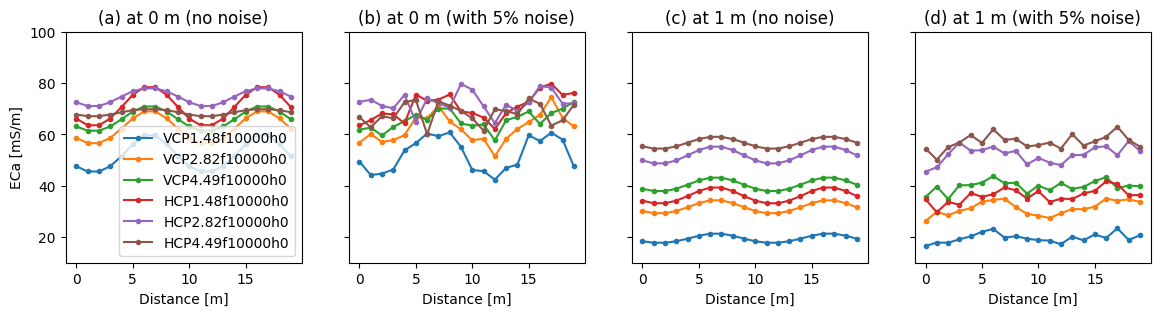

In [4]:
# graph of apparent values
titles = ['at 0 m (no noise)', 'at 0 m (with 5% noise)',
          'at 1 m (no noise)', 'at 1 m (with 5% noise)']
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(14,3))
for i in range(4):
    ax = axs[i]
    ks[i].show(ax=ax, vmin=10, vmax=100)
    ax.set_title('({:s}) {:s}'.format(letters[i], titles[i]))
    if i > 0:
        ax.get_legend().remove()
        ax.set_ylabel('')